In [1]:
import pandas as pd


covid_data = pd.read_csv('owid-covid-data.csv')

In [28]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
#covid_data['iso_code'] = covid_data['iso_code'].astype("string")
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [3]:
covid_data.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

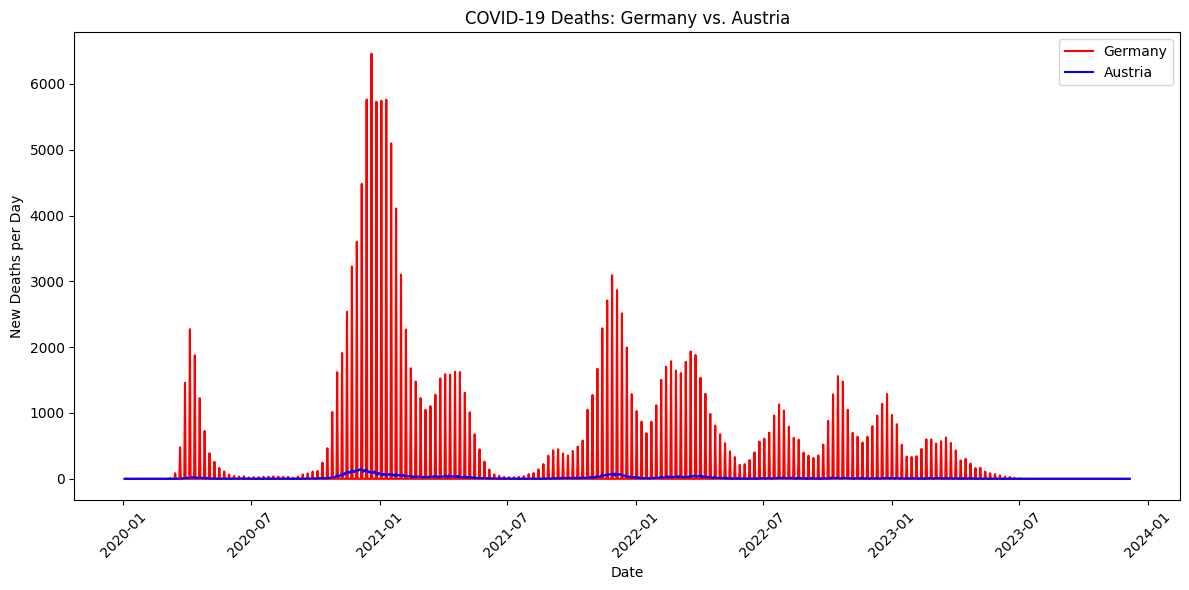

In [33]:
import matplotlib.pyplot as plt

country1 = 'Germany'
country2 = 'Austria'

covid_data = pd.read_csv('owid-covid-data.csv')

# Filter data for the first country
country1_data = covid_data[covid_data['location'] == country1].copy()

# Filter data for the second country
country2_data = covid_data[covid_data['location'] == country2].copy()

# Convert into datetime objects
country1_data['date'] = pd.to_datetime(country1_data['date'])
country2_data['date'] = pd.to_datetime(country2_data['date'])

country1_deaths = country1_data.groupby('date')['new_deaths'].sum()
country2_deaths = country2_data.groupby('date')['new_deaths'].sum()

# DataFrame for comparison
comparison_data = pd.DataFrame({
    country1: country1_deaths,
    country2: country2_deaths
})

comparison_data.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(comparison_data.index, comparison_data[country1], label=country1, color='red')
plt.plot(comparison_data.index, comparison_data[country2], label=country2, color='blue')
plt.title(f'COVID-19 Deaths: {country1} vs. {country2}')
plt.xlabel('Date')
plt.ylabel('New Deaths per Day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

